In [1]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
#import packages
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 11s 0us/step


In [5]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [6]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [7]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [8]:
print(len(train_dir))

50


In [9]:
batch_size = 100
IMG_SHAPE = 150

In [10]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [11]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     horizontal_flip=True,
                                     rotation_range=45,
                                     zoom_range=0.5,
                                     height_shift_range=0.15,
                                     width_shift_range=0.15)


train_data_gen = image_gen_train.flow_from_directory(train_dir,
                                                     batch_size=batch_size,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse',
                                                     shuffle=True)

Found 2935 images belonging to 5 classes.


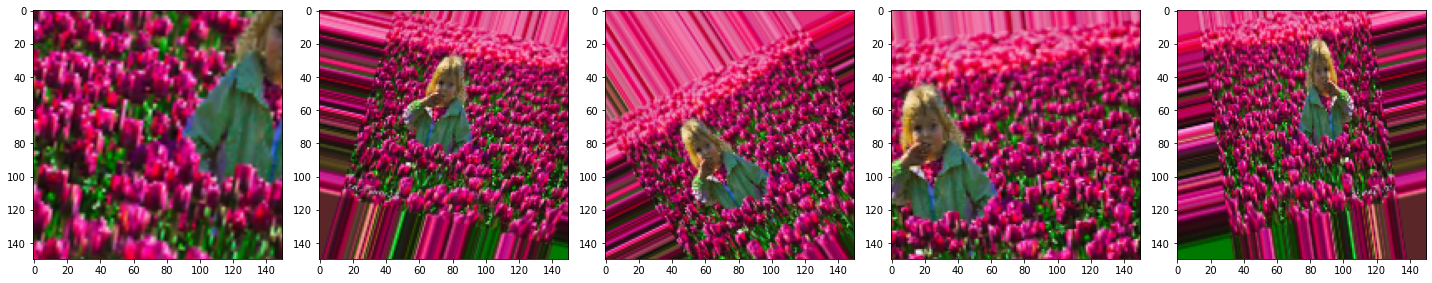

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(val_dir,
                                                 batch_size=batch_size,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                 class_mode='sparse',
                                                 shuffle=False)

Found 735 images belonging to 5 classes.


In [14]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
# Compile the model
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [17]:
epochs = 80

history = model.fit_generator(train_data_gen,
                              steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
                              epochs=epochs,
                              validation_data=val_data_gen,
                              validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
                              )

Epoch 1/80
30/30 [==============================] - 14s 466ms/step - loss: 1.7111 - acc: 0.2930 - val_loss: 1.3321 - val_acc: 0.4150
Epoch 2/80
30/30 [==============================] - 14s 450ms/step - loss: 1.2260 - acc: 0.4722 - val_loss: 1.0658 - val_acc: 0.5524
Epoch 3/80
30/30 [==============================] - 14s 452ms/step - loss: 1.0932 - acc: 0.5520 - val_loss: 1.0219 - val_acc: 0.5891
Epoch 4/80
30/30 [==============================] - 13s 444ms/step - loss: 1.0289 - acc: 0.5925 - val_loss: 0.9822 - val_acc: 0.6109
Epoch 5/80
30/30 [==============================] - 13s 449ms/step - loss: 0.9847 - acc: 0.6037 - val_loss: 0.9305 - val_acc: 0.6435
Epoch 6/80
30/30 [==============================] - 13s 449ms/step - loss: 0.9572 - acc: 0.6235 - val_loss: 0.9779 - val_acc: 0.6041
Epoch 7/80
30/30 [==============================] - 13s 445ms/step - loss: 0.9391 - acc: 0.6259 - val_loss: 0.8880 - val_acc: 0.6449
Epoch 8/80
30/30 [==============================] - 13s 445ms/step - 

Epoch 38/80
30/30 [==============================] - 13s 445ms/step - loss: 0.6152 - acc: 0.7646 - val_loss: 0.7364 - val_acc: 0.7088
Epoch 39/80
30/30 [==============================] - 13s 446ms/step - loss: 0.5793 - acc: 0.7768 - val_loss: 0.6799 - val_acc: 0.7565
Epoch 40/80
30/30 [==============================] - 13s 445ms/step - loss: 0.5825 - acc: 0.7785 - val_loss: 0.6012 - val_acc: 0.7673
Epoch 41/80
30/30 [==============================] - 13s 441ms/step - loss: 0.5586 - acc: 0.7779 - val_loss: 0.5967 - val_acc: 0.7646
Epoch 42/80
30/30 [==============================] - 13s 448ms/step - loss: 0.5588 - acc: 0.7843 - val_loss: 0.6403 - val_acc: 0.7524
Epoch 43/80
30/30 [==============================] - 13s 445ms/step - loss: 0.5461 - acc: 0.7898 - val_loss: 0.6273 - val_acc: 0.7415
Epoch 44/80
30/30 [==============================] - 13s 447ms/step - loss: 0.5464 - acc: 0.7847 - val_loss: 0.6141 - val_acc: 0.7619
Epoch 45/80
30/30 [==============================] - 13s 444ms

Epoch 75/80
30/30 [==============================] - 13s 446ms/step - loss: 0.4279 - acc: 0.8426 - val_loss: 0.6469 - val_acc: 0.7741
Epoch 76/80
30/30 [==============================] - 14s 451ms/step - loss: 0.4251 - acc: 0.8388 - val_loss: 0.7068 - val_acc: 0.7782
Epoch 77/80
30/30 [==============================] - 13s 439ms/step - loss: 0.4063 - acc: 0.8453 - val_loss: 0.6398 - val_acc: 0.7946
Epoch 78/80
30/30 [==============================] - 13s 447ms/step - loss: 0.4006 - acc: 0.8429 - val_loss: 0.7656 - val_acc: 0.7578
Epoch 79/80
30/30 [==============================] - 13s 450ms/step - loss: 0.4006 - acc: 0.8440 - val_loss: 0.6217 - val_acc: 0.7878
Epoch 80/80
30/30 [==============================] - 14s 454ms/step - loss: 0.4095 - acc: 0.8491 - val_loss: 0.7119 - val_acc: 0.8014


Text(0.5, 1.0, 'Training and Validation Loss')

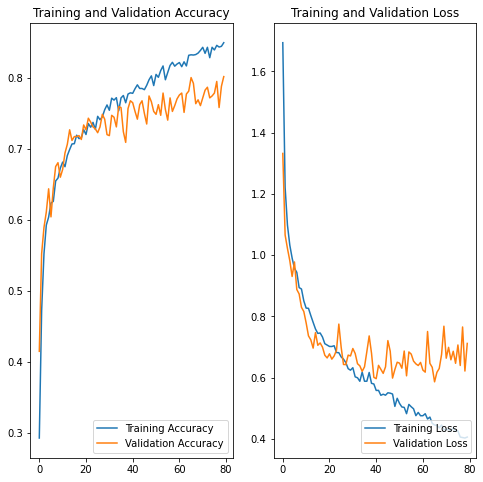

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title("Training and Validation Loss")
